In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import time

In [2]:
def load_and_preprocess(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    image = cv2.resize(image, (1280, 720))  # FIXED this line
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image, gray_image

In [3]:
 ## Substacting the image

In [4]:
def substract_images(img1, img2):
    diff = cv2.absdiff(img1, img2)
    thresh = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)[1]
    return diff, thresh

In [5]:
# Paths
image_path1 = 'static.png'
image_path2 = 'test.png'
# Load images
image1, gray_image1 = load_and_preprocess(image_path1)
image2, gray_image2 = load_and_preprocess(image_path2)
# same image size
gray_image2 = cv2.resize(gray_image2, (gray_image1.shape[1], gray_image1.shape[0]))
# Difference and threshold
diff = cv2.absdiff(gray_image1, gray_image2)
_, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)


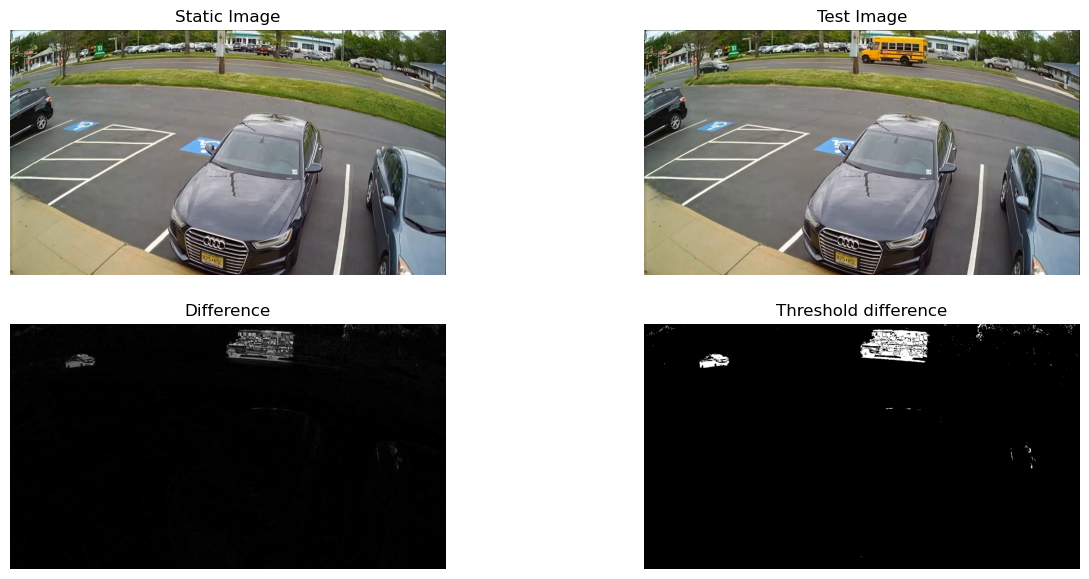

In [6]:
# Display results

plt.figure(figsize=(15, 7))

plt.subplot(2, 2, 1)
plt.title('Static Image')
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Test Image')
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Difference')
plt.imshow(diff, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Threshold difference')
plt.imshow(thresh, cmap='gray')
plt.axis('off')

plt.show()

In [7]:
# Dilating the image

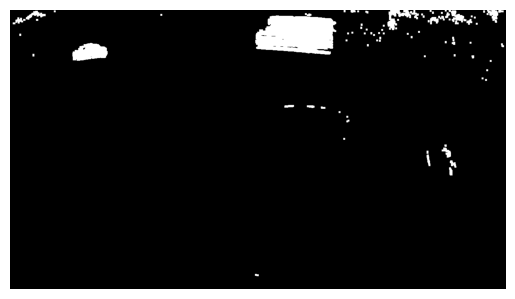

In [8]:
dilated_image = cv2.dilate(thresh, None, iterations = 2)
plt.imshow(dilated_image, cmap = 'gray')
plt.axis('off')
plt.show()

In [9]:
cnts = cv2.findContours(dilated_image.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts

(array([[[632, 681]],
 
        [[632, 685]],
 
        [[635, 685]],
 
        [[636, 686]],
 
        [[641, 686]],
 
        [[641, 682]],
 
        [[637, 682]],
 
        [[636, 681]]], dtype=int32),
 array([[[1133,  406]],
 
        [[1133,  411]],
 
        [[1134,  412]],
 
        [[1134,  424]],
 
        [[1135,  425]],
 
        [[1135,  426]],
 
        [[1141,  426]],
 
        [[1141,  413]],
 
        [[1139,  411]],
 
        [[1139,  410]],
 
        [[1138,  409]],
 
        [[1138,  408]],
 
        [[1137,  407]],
 
        [[1137,  406]]], dtype=int32),
 array([[[1136,  388]],
 
        [[1136,  389]],
 
        [[1135,  390]],
 
        [[1135,  394]],
 
        [[1136,  394]],
 
        [[1138,  396]],
 
        [[1138,  402]],
 
        [[1142,  402]],
 
        [[1143,  401]],
 
        [[1143,  400]],
 
        [[1144,  399]],
 
        [[1145,  400]],
 
        [[1145,  402]],
 
        [[1147,  404]],
 
        [[1147,  406]],
 
        [[1151,  406]],
 
  

In [10]:
#Loop over the contours
for c in cnts:
    # contoursArea to contourArea
    if cv2.contourArea(c) < 700:
        continue
    else:
        (x,y,w,h) = cv2.boundingRect(c)
    # Fixed the rectangle coordinates - second point should be starting(x+w), ending(y+h), color,.. 
    cv2.rectangle(image2,(x,y),(x+w,y+h),(0,255,0),2)

cv2.imshow('Test', image2)
cv2.waitKey(5000)
cv2.destroyAllWindows()
plt.show()



In [11]:
## Testing with mp4 / vedio cap

In [27]:
video_path = 'test.mp4'
video_cap = cv2.VideoCapture(video_path)  # use the video path 
static_frame = None

while True:
    success, frame = video_cap.read()
    if not success:
        break
    
    # Remove cv2.imread(image_path)
    frame = cv2.resize(frame, (1280, 720))
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    # gray_image to gray_frame
    if static_frame is None:
        static_frame = gray_frame  
        continue
    diff, thresh = substract_images(static_frame, gray_frame)  
    
    dilated_image = cv2.dilate(thresh, None, iterations=2)  # Dilating the frames

    cnts = cv2.findContours(dilated_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    # Fixed indentation for the for loop
    for c in cnts:
       
        if cv2.contourArea(c) < 700:
            continue
        else:
            (x, y, w, h) = cv2.boundingRect(c)
            # Draw rectangle on frame, not image2
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    cv2.imshow('MOTION DETECTION', frame)

    # Exit when key is pressed
    if cv2.waitKey(5) & 0xFF != 255:
        break
        time.sleep(1)  # Fixed typo in sleep function

video_cap.release()
cv2.destroyAllWindows()